<a href="https://colab.research.google.com/github/simoneminorr/GH-demo/blob/main/notebooks/09-pandas-walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mock Data in Pandas

To set up this interactive tutorial, go to https://mockaroo.com and generate 1000-record data set. You can drop the `ip_address` column, and add one called `age` that is populated by plain whole numbers. Be sure to format it as a CSV and to include the header row.

Download that file `MOCK_DATA.csv` and drag it to the file explorer here in Google Colab.

In [ ]:
# Set up basic stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# import the mockaroo file into a dataframe
mock_data = pd.read_csv("MOCK_DATA.csv")

In [ ]:
# get basic info about the df
mock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1000 non-null   int64 
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
 4   gender      1000 non-null   object
 5   age         1000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


In [ ]:
# get information about this df's index
# note it starts at 0 and ends at 1000
# so the data file is 1001 records long
# (remember we included the header row!)
mock_data.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
# get the head rows - whatever number of records I want
mock_data.head(3)

,id,first_name,last_name,email,gender,age
0,1,Mavra,Driuzzi,mdriuzzi0@telegraph.co.uk,Female,68
1,2,La verne,Opdenorth,lopdenorth1@yale.edu,Genderqueer,25
2,3,Karine,Paynter,kpaynter2@arstechnica.com,Female,3


In [ ]:
# same command as head, but gives me the end of the df
mock_data.tail()

,id,first_name,last_name,email,gender,age
995,996,Miranda,Gettone,mgettonern@acquirethisname.com,Female,47
996,997,Tiffanie,Layhe,tlayhero@utexas.edu,Female,23
997,998,Tammi,Bilam,tbilamrp@phpbb.com,Female,28
998,999,Cherida,Jirka,cjirkarq@weibo.com,Female,87
999,1000,Ailis,Scolts,ascoltsrr@eventbrite.com,Female,58


In [ ]:
# grab a specific row from a df
mock_data.loc[9]

id                              10
first_name                    Land
last_name                 Gritsaev
email         lgritsaev9@youku.com
gender                        Male
age                             14
Name: 9, dtype: object

In [ ]:
# gives me some statistical information about my data
# fairly meaningless in this sample data.
mock_data.describe()

,id,age
count,1000.000000,1000.000000
mean,500.500000,46.221000
std,288.819436,26.124752
min,1.000000,1.000000
25%,250.750000,24.750000
50%,500.500000,47.000000
75%,750.250000,69.000000
max,1000.000000,90.000000


In [ ]:
# get the columns from the df
mock_data.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'age'], dtype='object')

In [ ]:
# what data types are in this df?
mock_data.dtypes

id             int64
first_name    object
last_name     object
email         object
gender        object
age            int64
dtype: object

In [ ]:
# Rename column headers
mock_data = mock_data.rename(columns={"first_name":"fname","last_name":"lname"})

In [ ]:
# Now see the new names
mock_data.head()

,id,fname,lname,email,gender,age
0,1,Mavra,Driuzzi,mdriuzzi0@telegraph.co.uk,Female,68
1,2,La verne,Opdenorth,lopdenorth1@yale.edu,Genderqueer,25
2,3,Karine,Paynter,kpaynter2@arstechnica.com,Female,3
3,4,Roderick,Versey,rversey3@altervista.org,Male,41
4,5,Beitris,Durham,bdurham4@geocities.com,Female,42


In [ ]:
# pull out just one column by name - Method 1
mock_data['fname']

0         Mavra
1      La verne
2        Karine
3      Roderick
4       Beitris
         ...   
995     Miranda
996    Tiffanie
997       Tammi
998     Cherida
999       Ailis
Name: fname, Length: 1000, dtype: object

In [ ]:
# pull out just one column by name - Method 2 (the dot method)
mock_data.fname

0         Mavra
1      La verne
2        Karine
3      Roderick
4       Beitris
         ...   
995     Miranda
996    Tiffanie
997       Tammi
998     Cherida
999       Ailis
Name: fname, Length: 1000, dtype: object

In [ ]:
# Pull out TWO columns at the same time
mock_data[['fname','lname']]

,fname,lname
0,Mavra,Driuzzi
1,La verne,Opdenorth
2,Karine,Paynter
3,Roderick,Versey
4,Beitris,Durham
...,...,...
995,Miranda,Gettone
996,Tiffanie,Layhe
997,Tammi,Bilam
998,Cherida,Jirka


<Axes: >

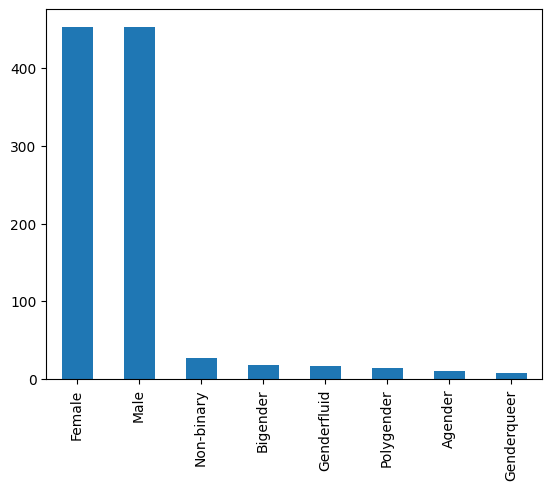

In [ ]:
# Let's create a plot. Query the df for 'gender' and perform
# a value count on the returned values. Plot as a bar chart.
# could be a bar chart, line chart
pd.value_counts(mock_data['gender']).plot.bar()

In [ ]:
mock_data.groupby(['gender'])['age'].mean()

gender
Agender        41.200000
Bigender       45.944444
Female         46.807947
Genderfluid    52.941176
Genderqueer    28.750000
Male           46.099338
Non-binary     37.925926
Polygender     52.928571
Name: age, dtype: float64